In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Zomato data .csv")

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


#  What type of restaurtant do the majority of customers orders

In [ ]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [ ]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)
df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#  Types of restaurent

Text(0.5, 0, 'Type of restarent')

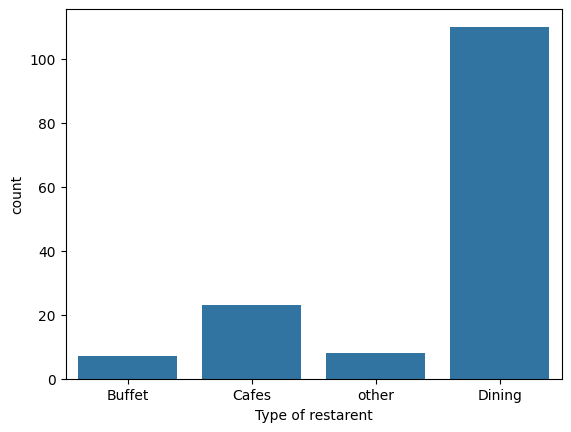

In [ ]:
sns.countplot(x=df["type"])
plt.xlabel("Type of restarent")

In [ ]:
df = df.rename(columns={"listed_in(type)":"type"})

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


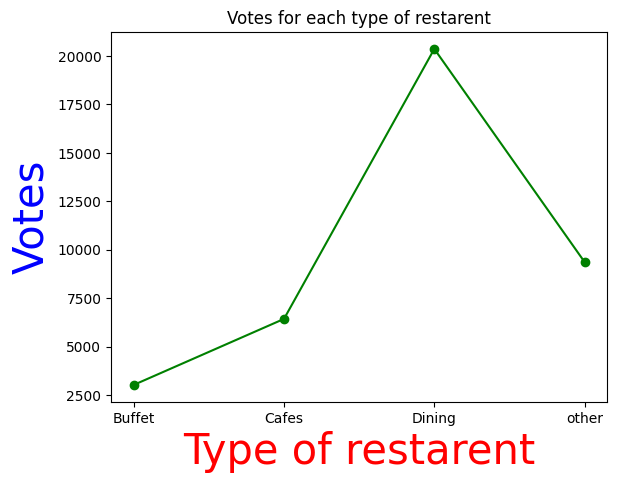

In [ ]:
grouped_data = df.groupby("type")["votes"].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green", marker ="o")
plt.xlabel("Type of restarent", c="red",size=30)
plt.ylabel("Votes",c="blue",size=30)
plt.title("Votes for each type of restarent")
plt.show()

In [ ]:
grouped_data = df.groupby("type")["votes"].sum()

In [ ]:
grouped_data

,votes
type,
Buffet,3028
Cafes,6434
Dining,20363
other,9367


#   Rating   Distribution

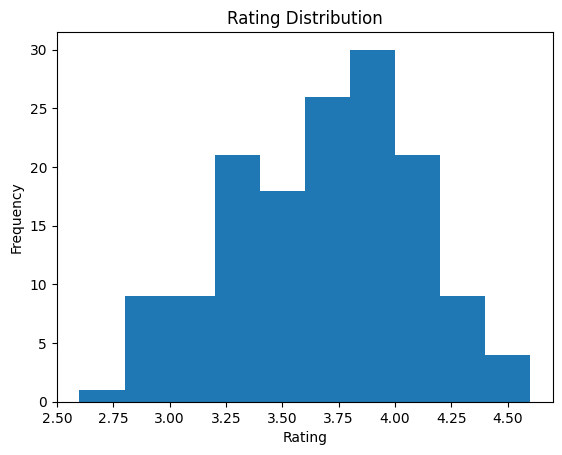

In [ ]:
plt.hist(df['rate'], bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#  Average order spending by customers

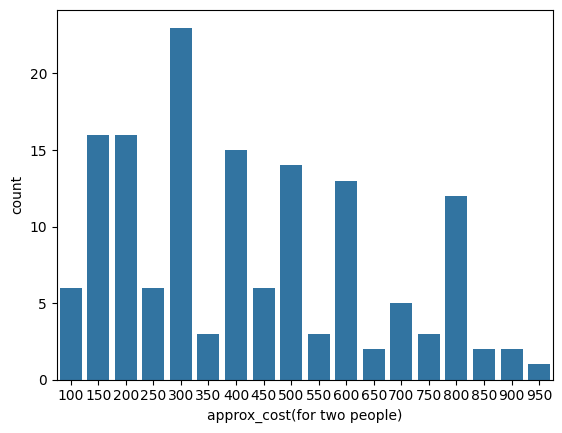

In [ ]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data)
plt.show()


In [ ]:
avarage_cost = df["approx_cost(for two people)"].mean()

In [ ]:
avarage_cost

418.2432432432432

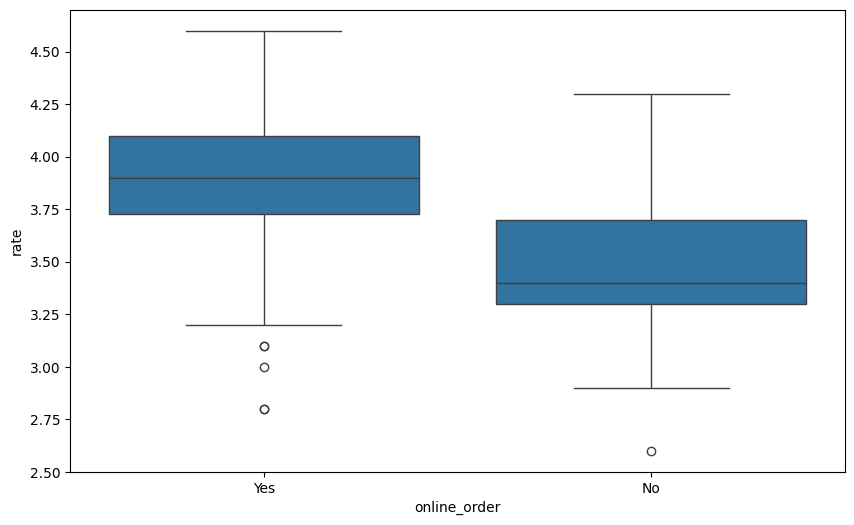

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="online_order",y="rate",data=df)
plt.show()

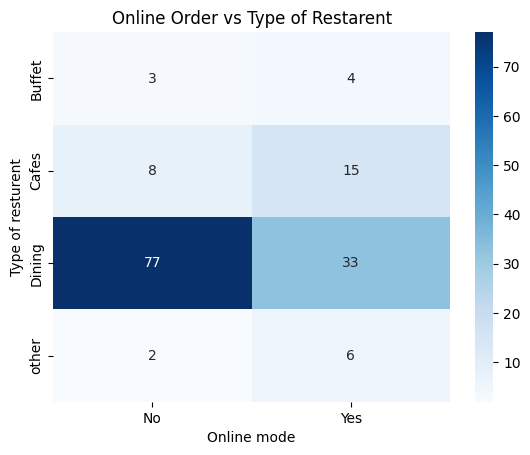

In [ ]:
pivot_table = df.pivot_table(index="type", columns="online_order", aggfunc="size",fill_value=0)
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt = 'd')
plt.title("Online Order vs Type of Restarent")
plt.xlabel("Online mode")
plt.ylabel("Type of resturent")
plt.show()